## Topics

## 1. Implementing the Sigmoid Activation Function
## 2. The "error" as the Loss Function

## Lab: Homeowork 1 and Github Classroom



In [1]:
%matplotlib inline
# All imports
from random import choice
import numpy as np
import matplotlib.pyplot as plt


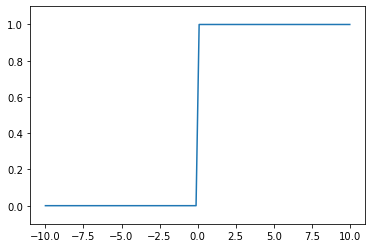

In [2]:
"Step Function"

step_fun = lambda x: x > 0 
# x = np.array([-1, 1])
# step_fun(x)
x = np.linspace(-10, 10, 100)
z = step_fun(x)
plt.plot(x, z)
plt.ylim(-.1, 1.1)
plt.show()

## Let's turn this into a classifier!!

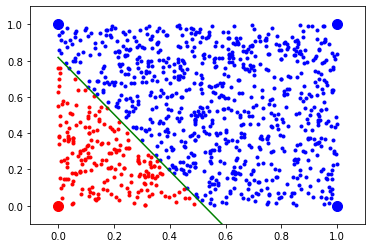

In [3]:
'''

Perceptron to implement the NOR operation

This version ensures training is only done once, achieving perfect boundary and of course faster speed


'''
def training(training_data, show_train = False):
    # usu. random numbers for weights is not a bad starting point
    w = np.random.rand(3)
    errors = []

    # "learning rate"
    alfa = 0.2

    # use 100 training steps
    n = 100
    # w.history = []
    for i in range(n):
        x_train, target = choice(training_data)
        y = np.dot(w, x_train)
        error = target - step_fun(y)
        errors.append(error)
        w += alfa * error * x_train

    if show_train:
        print('weights:', w)
        print('Training results:')
        for x_train, _ in training_data:
            y = np.dot(x_train, w)
            print("{}: {} -> {}".format(x_train[:2], y, step_fun(y)))

    return w

def NOR_perceptron_classifier(x, w_trained = [], show_train = False):    
    training_data = [
        (np.array([0,0,1]), 1),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 0),
    ]

    if len(w_trained) == 0:
        w_trained = training(training_data, show_train = show_train)
    
    x = np.append(x, 1)
    return step_fun(np.dot(x, w_trained)), w_trained

x_arr = np.random.rand(1000, 2)

z_arr = np.array([])
for i, x in enumerate(x_arr):
    if i == 0:
        z, w_trained = NOR_perceptron_classifier(x)
    else:
        #z, _ = NOR_perceptron_classifier(x, w_trained = w_trained)
        #same way:
        z = NOR_perceptron_classifier(x, w_trained = w_trained)[0]
    z_arr = np.append(z_arr, z)

for i, x in enumerate(x_arr):
    if z_arr[i]:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'b.')

x0 = np.array([0, 1])

x1 = x0 * (-w_trained[0] / w_trained[1]) - w_trained[2] / w_trained[1]
plt.plot(x0, x1, 'g-')
plt.axis([-0.1, 1.1, -0.1, 1.1])
x_train = [np.array([0, 0, 1, 1]), np.array([0,1,0,1])]
plt.plot([0, 1, 1], [1, 0, 1], 'bo', ms = 10)
plt.plot([0,], [0,], 'ro', ms = 10)
plt.show()


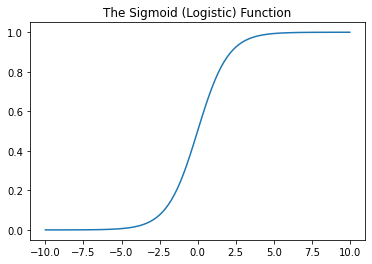

In [4]:
'''
Sigmoid function
'''

y = np.linspace(-10, 10, 100)
S = 1 / (1 + np.e ** (-y))
plt.plot(y, S)
plt.title('The Sigmoid (Logistic) Function')
plt.show()

## Breakout Exercise:

## Implement the NOR classifier using the Sigmoid function, instead of the step function

## Preliminary Steps:

### 1. Write a sigmoid function
### 2. Write a function that caclculates the derivative of the sigmoid function (remeember it's easier to do it using z, the output -- see lab exercise for Week 5-1 for the tahn function)


## In addition:

## 3. Rewrite the classifier function, such that it has the following call signature

     perceptron_classifier(x, N=1000, alfa=0.2, show_train=False, w_trained=[], training_data=[])
 
## 4. After the training is done, plot the error^2 vs. training steps.

<br>
<br>

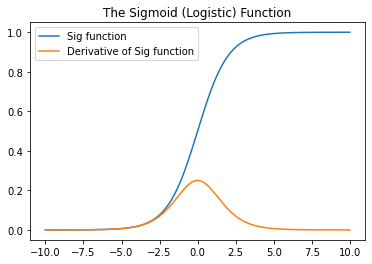

In [5]:
#derivative is easier express in terms of dependent variable dz/dy=z(1-z)
def sigmoid_fun (y, a=1):
    return 1 / (1+np.exp(-(y*a)))

y = np.linspace(-10, 10, 1000)
sig = sigmoid_fun(y)

def derivative_sig_f(sog):
    return sig*(1-sig)
    
z = derivative_sig_f(sig)
    
plt.plot(y, sig, label='Sig function')
plt.plot(y, z, label='Derivative of Sig function')
plt.title('The Sigmoid (Logistic) Function')
plt.legend()
plt.show()

In [7]:
#rewrite classifier function to use sigmoid function as activation

def perceptron_classifier(x, training_data=[], w_trained=[], N=1000, alfa=0.2, show_train = False):
    # usu. random numbers for weights is not a bad starting point
    if len(w_trained) == 0 and len(training_data) == 0:
        print('Error. Training data array and weights array cannot be empty')
        return

    if len(w_trained) == 0:
        w = np.random.rand(3)
        errors = []
        
        for i in range(N):
            x_train, target = choice(training_data)
        
         #picking random row, stochastic 
            y = np.dot(w, x_train)
            z = sigmoid_fun(y)
            error = target - z
            errors.append(error)
            w += alfa * error * derivative_sig_f(z) * x_train 

        if show_train:
            print('weights:', w)
            print('Training results:')
            for x_train, _ in training_data:
                y = np.dot(x_train, w)
                print("{}: {} -> {}".format(x_train[:2], y, sigmoid_fun(y)))

#     if len(w_trained) == 0:
#         w_trained, errors_trained = perceptron_classifier(N, alfa, training_data, show_train = show_train)
    else:
        w = w_trained
    
    z1=sigmoid_fun(np.dot(x, w))
    x = np.append(x, 1)
    print(z1.shape)
    return z1, w, errors

#NOR
# training_data =[ 
#     (np.array([0,0,1]), 1),
#     (np.array([0,1,1]), 0),
#     (np.array([1,0,1]), 0),
#     (np.array([1,1,1]), 0),
# ] 

#AND
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
] 

#OR
# training_data = [
#     (np.array([0,0,1]), 0),
#     (np.array([0,1,1]), 1),
#     (np.array([1,0,1]), 1),
#     (np.array([1,1,1]), 1),
# ]

#XOR
# training_data = [
#     (np.array([0,0,1]), 0),
#     (np.array([0,1,1]), 1),
#     (np.array([1,0,1]), 1),
#     (np.array([1,1,1]), 0),
# ]

# N = 1000
# alfa = 50

x_arr = np.random.rand(1000, 2)
sig_arr = np.array([])
errors_trained = []


for i, x in enumerate(x_arr):
    if i == 0:
        sig, w_trained, errors_trained = perceptron_classifier(x, training_data)
    else:
        sig, _, errors_trained = perceptron_classifier(x, training_data, w_trained = w_trained)
    sig_arr = np.append(sig_arr, s)

    
#plots
plt.figure()
for i, x in enumerate(x_arr):
    #changed ==0 to >=0.5 because in step function there is only 0 and 1, but in sigmoid function there is everythings between 0 and 1
    if z_arr[i]>=0.5:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'b.')

x0 = np.array([0, 1])

x1 = x0 * (-w_trained[0] / w_trained[1]) - w_trained[2] / w_trained[1]
plt.plot(x0, x1, 'g-')
plt.axis([-0.1, 1.1, -0.1, 1.1])
x_train = [np.array([0, 0, 1, 1]), np.array([0,1,0,1])]
plt.plot([0, 1, 1], [1, 0, 1], 'bo', ms = 10)
plt.plot([0,], [0,], 'ro', ms = 10)

ValueError: operands could not be broadcast together with shapes (1000,) (3,) 

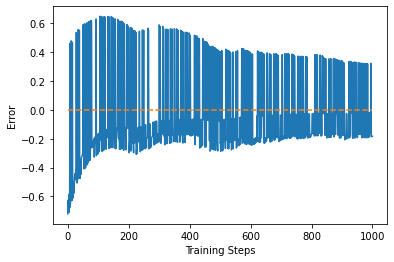

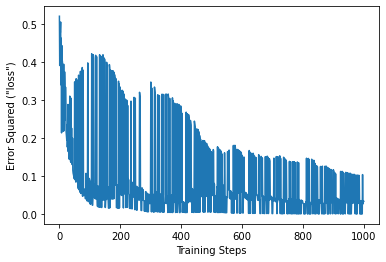

In [73]:
plt.figure()
plt.plot(range(N), errors_trained)
plt.plot(np.zeros(len(errors_trained)), '--')
plt.ylabel('Error')
#plt.ylim(-1, 1)
plt.xlabel('Training Steps')


plt.figure()
plt.plot(np.array(errors_trained)**2)
plt.ylabel('Error Squared ("loss")')
plt.xlabel('Training Steps')
#plt.ylim(-1e-3, 0.5)
plt.show()

## Lab 

## 1. Additoinal thoughts on homework 1 (bounds, maximum iterations)
## 2. Github Classroom

Compare this error vs. training step vs. the "binary" one when we used the step function

Note the error^2 is the loss function, it is the negative of the performance function:

P = -1/2(d-z)**2

Loss = 1/2(d-z)**2

From now on, we will use the loss function. 
Also Change in notation:

d -> y



# End of Week 6-1